In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [ ]:
x = df.drop('label' , axis='columns')
y = df['label']
x= x/255

In [ ]:
x.values[3056]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

5


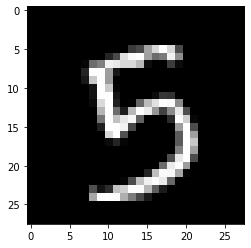

In [ ]:
print(y[3056])

import matplotlib.pyplot as plt

plt.imshow(x.values[3056].reshape(28,28) , cmap='gray')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_val , y_train, y_val = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42 )

here we are going to use sklearn models to fit the data into a NN model that have 64 nuroal in the frist hidden layer, 32 nuroal in the  hidden layer, and 10 output layers.

 Model creating

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU, Dense

In [ ]:
model = keras.Sequential([
    Dense(64, input_shape=(784,), activation='sigmoid'),
    Dense(32, activation=LeakyReLU(alpha=0.3)),
    Dense(32, activation=LeakyReLU(alpha=0.3)),

    Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

summary of model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#ploting the model

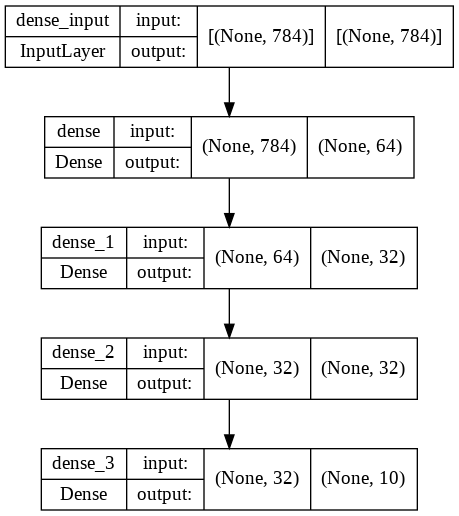

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

using the model for training

In [ ]:
model.fit(
    x= x_train,
    y= y_train,
    validation_data=(x_val, y_val),
    workers=10,
    epochs=10)

Epoch 1/10
1116/1116 [==============================] - 4s 3ms/step - loss: 0.4734 - accuracy: 0.8667 - val_loss: 0.2581 - val_accuracy: 0.9235
Epoch 2/10
1116/1116 [==============================] - 3s 3ms/step - loss: 0.2102 - accuracy: 0.9382 - val_loss: 0.1928 - val_accuracy: 0.9424
Epoch 3/10
1116/1116 [==============================] - 3s 3ms/step - loss: 0.1546 - accuracy: 0.9544 - val_loss: 0.1714 - val_accuracy: 0.9478
Epoch 4/10
1116/1116 [==============================] - 3s 2ms/step - loss: 0.1241 - accuracy: 0.9626 - val_loss: 0.1644 - val_accuracy: 0.9510
Epoch 5/10
1116/1116 [==============================] - 3s 3ms/step - loss: 0.0996 - accuracy: 0.9694 - val_loss: 0.1595 - val_accuracy: 0.9519
Epoch 6/10
1116/1116 [==============================] - 3s 2ms/step - loss: 0.0831 - accuracy: 0.9735 - val_loss: 0.1224 - val_accuracy: 0.9629
Epoch 7/10
1116/1116 [==============================] - 3s 2ms/step - loss: 0.0688 - accuracy: 0.9780 - val_loss: 0.1292 - val_accuracy:

 test values predicted

In [ ]:
xtest = x/255
ypre= model.predict(xtest)
ypre

array([[2.1996011e-05, 1.3902412e-02, 1.5554965e-03, ..., 7.7259123e-01,
        4.3967586e-07, 8.2386498e-05],
       [2.9039607e-05, 1.1038672e-02, 1.7983775e-03, ..., 7.8719759e-01,
        4.3613738e-07, 8.1373961e-05],
       [2.0809992e-05, 1.4096917e-02, 1.5513228e-03, ..., 7.8188443e-01,
        4.0819046e-07, 8.3912353e-05],
       ...,
       [1.9686295e-05, 8.9250458e-03, 1.2575899e-03, ..., 8.0102271e-01,
        3.6202005e-07, 8.7546272e-05],
       [2.4650461e-05, 1.2733217e-02, 1.6551984e-03, ..., 7.7930743e-01,
        4.2724923e-07, 8.1612234e-05],
       [2.0484771e-05, 1.1220304e-02, 1.4476749e-03, ..., 8.0985862e-01,
        3.6219629e-07, 8.3715262e-05]], dtype=float32)

read the submission file

In [ ]:
sample = pd.read_csv('/content/my_submission.csv')
sample1 = sample.drop(columns= 'ImageId')
sample1[:5]

,Label
0,2
1,0
2,9
3,4
4,3


 prediction matrix get transform into values

In [ ]:
y_predicted = [np.argmax(i) for i in ypre]
y_predicted[:5]

[7, 7, 7, 7, 7]

In [ ]:
print(len(sample1),'<-- sample prediction-->  ' ,  len(y_predicted))

28000 <-- sample prediction-->   42000


In [ ]:
#saving the prediction values

In [ ]:
y_predicted = pd.DataFrame(y_predicted)
newY = pd.concat([sample.drop(columns='Label'), y_predicted], axis = 1)

In [ ]:
newY.columns=['ImageId', 'Label']
newY.head()

,ImageId,Label
0,1.0,7
1,2.0,7
2,3.0,7
3,4.0,7
4,5.0,7


model is evaluating in test data

In [ ]:
model.evaluate(xtest,y_predicted)

1313/1313 [==============================] - 2s 2ms/step - loss: 0.2450 - accuracy: 1.0000


[0.2449699342250824, 1.0]

saving the values in CSV file

In [ ]:
newY.to_csv('my_submission.csv', index= False)